<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

Task 1: Become familiar with the dataset
The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


##### TASK 02:

In [47]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,age_group
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,35-70
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 older
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,35-70
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,35-70
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,35-70


For the "Median value of owner-occupied homes" provide a __boxplot__

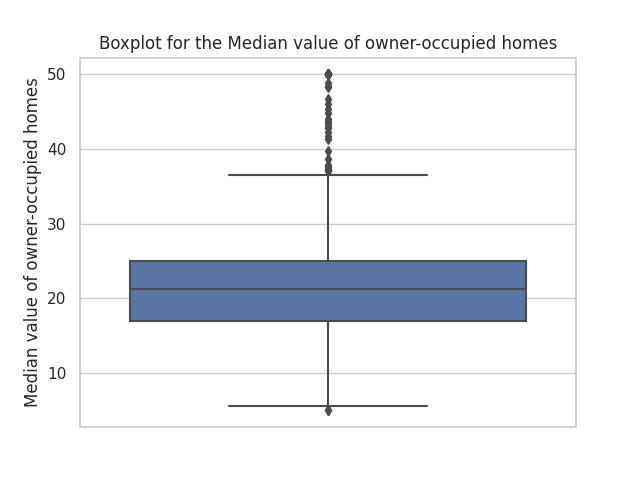

In [34]:
sns.set(style="whitegrid")
ax = sns.boxplot(y='MEDV', data=boston_df)
ax.set(ylabel='Median value of owner-occupied homes')
pyplot.title('Boxplot for the Median value of owner-occupied homes')
pyplot.show()

Provide a  __bar plot__ for the Charles river variable

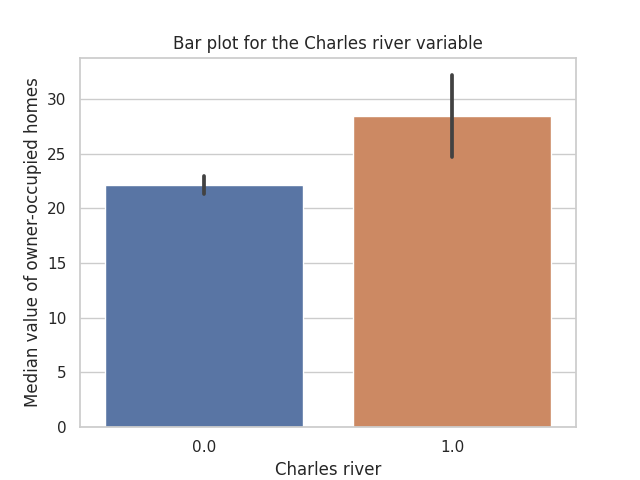

In [37]:
ax = sns.barplot(x="CHAS",y='MEDV', data=boston_df)
ax.set(xlabel='Charles river',ylabel='Median value of owner-occupied homes')
pyplot.title('Bar plot for the Charles river variable')
pyplot.show()

Provide a __boxplot__ for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

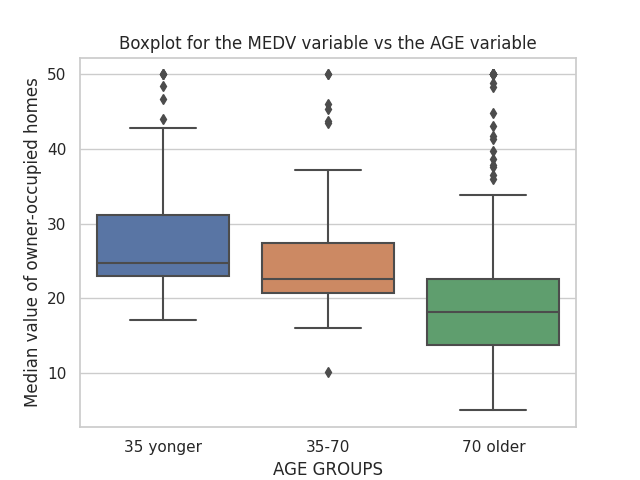

In [39]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 yonger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = '35-70'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 older'
ax=sns.boxplot(x='age_group', y = 'MEDV', order =['35 yonger','35-70','70 older'], data=boston_df)
ax.set(xlabel='AGE GROUPS',ylabel='Median value of owner-occupied homes')
pyplot.title('Boxplot for the MEDV variable vs the AGE variable')
pyplot.show()

Provide a __scatter plot__ to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

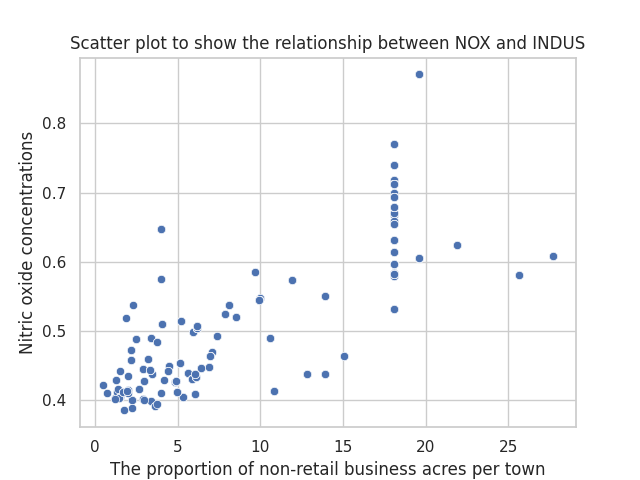

In [45]:
ax = sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
ax.set(xlabel='The proportion of non-retail business acres per town',ylabel='Nitric oxide concentrations')
pyplot.title('Scatter plot to show the relationship between NOX and INDUS')
pyplot.show()

Create a __histogram__ for the pupil to teacher ratio variable

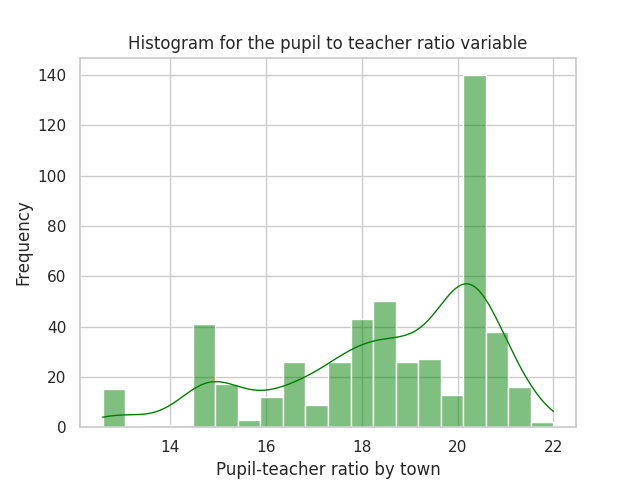

In [27]:
ax = sns.histplot(boston_df['PTRATIO'],
                  bins=20,
                  kde=True,
                  color='green',
                  line_kws={"linewidth": 1,'alpha':1})
ax.set(xlabel='Pupil-teacher ratio by town', ylabel='Frequency')
pyplot.title('Histogram for the pupil to teacher ratio variable')
pyplot.show()

##### TASK 03:

__Be sure to:__

State your hypothesis.

Use α = 0.05

Perform the test Statistics.

State the conclusion from the test.

- Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

In [32]:
Ttest_result=scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0.0]['MEDV'],
                                   boston_df[boston_df['CHAS'] == 1.0]['MEDV'], equal_var = True)
print('H_0: µ_MEDV = µ_CHAS; H_1: µ_MEDV ≠ µ_CHAS')
print("p_value of the t-test =",Ttest_result[1],'less than 0.05 so we reject the null hypothesis')

H_0: µ_MEDV = µ_CHAS; H_1: µ_MEDV ≠ µ_CHAS
p_value of the t-test = 7.390623170519905e-05 less than 0.05 so we reject the null hypothesis


- Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [44]:
thirtyfive_lower=boston_df[boston_df['age_group']=='35 yonger']['MEDV']
thirtyfive_seventy=boston_df[boston_df['age_group']=='35-70']['MEDV']
seventy_older=boston_df[boston_df['age_group']=='70 older']['MEDV']
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)
print('H_0: µ_1 = µ_2 = µ_3 (the three population means are equal)','\nH_1:At least one of the means differ')
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))
print('Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that at least one of the means differ.')

H_0: µ_1 = µ_2 = µ_3 (the three population means are equal) 
H_1:At least one of the means differ
F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15
Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that at least one of the means differ.


- Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

In [46]:
pearson_result=scipy.stats.pearsonr(boston_df['INDUS'],boston_df['NOX'])
print('Pearson coefficient =',pearson_result[0],
      '\nSo the Nitric oxide concentrations and the proportion of non-retail business acres per town have a strong positive relationship')
print('p-value =',pearson_result[1])

Pearson coefficient = 0.7636514469209189 
So the Nitric oxide concentrations and the proportion of non-retail business acres per town have a strong positive relationship
p-value = 7.913361061211254e-98


- What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [54]:
## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 01 Feb 2023   Prob (F-statistic):           1.21e-08
Time:                        21:39:36   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In the correlation: we have and pearson R - p value is 1.21e-08, less than 0.05 there is evidence of correlation between beauty and evaluation scores

Like the t-test, the p-value is less than the alpha (α) level = 0.05, so we reject the null hypothesis as there is evidence that there is a difference in weighted distance  to the five Boston employment centres based on median value of owner occupied homes. The coefficient 1.0916 means that DIS get 1.0916 scores more than MEDV.